# "Pathway to Excellence: Enhancing Airline Passenger Satisfaction through Total Quality Management (TQM)"

## Intoduction
### Context
This dataset contains an airline passenger satisfaction survey.

### Columns Description
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

### General Analysis
What is the overall distribution of satisfaction levels among passengers?
How do different factors such as gender, age, customer type, and travel class correlate with satisfaction?
### Demographic Insights
How does gender influence satisfaction levels? Are there significant differences between male and female passengers?
What is the relationship between age and satisfaction? Are certain age groups more likely to be satisfied or dissatisfied?
How do loyal and disloyal customers differ in their satisfaction levels?
### Travel Characteristics
How does the type of travel (personal vs. business) impact satisfaction?
What is the correlation between travel class (Business, Eco, Eco Plus) and satisfaction levels?
Is there a relationship between flight distance and satisfaction? How do short and long flights compare?
### Service Quality Analysis
How do various service aspects (e.g., inflight wifi, seat comfort, food and drink) contribute to overall satisfaction?
Which service factors have the highest and lowest satisfaction levels? Where should improvements be focused?
Is there a correlation between delays (departure and arrival) and satisfaction levels?
### Predictive Modeling
Can we build a predictive model to forecast passenger satisfaction based on the given features? What would be the most significant predictors?
### TQM and Continuous Improvement
How can Total Quality Management (TQM) principles be applied to enhance service quality and satisfaction?
What are the potential incremental gains in satisfaction through continuous improvement in service aspects?
How can cross-functional collaboration be leveraged to create a holistic improvement strategy?

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Importing the dataset
df = pd.read_csv('Airline Passenger Satisfaction.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [44]:
# Check 'id' column duplicates
df['id'].duplicated().mean()

0.0

In [45]:
# Drop 'Unnamed: 0' and 'id' Columns
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [46]:
# Checking for missing values
df.isnull().mean() * 100

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

In [47]:
# Imputing missing values in "Arrival Delay in Minutes" with the median value
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)

In [48]:
# Check for duplicates
df.duplicated().mean()

0.0

In [49]:
# Describing the dataset
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Feature Engineering

In [50]:
# Create feature for all service features
service_features = ['Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

# Create the "Total Service Score" feature by averaging the values of the listed service features
df['Total_Service_Score'] = df[service_features].mean(axis=1)

# Display the "Total Service Score" feature first few rows to verify
df[['Total_Service_Score']].head()

,Total_Service_Score
0,3.857143
1,2.285714
2,3.714286
3,3.000000
4,3.500000


##### **Total Service Score:**

This feature represents the overall quality of service provided during the flight.

##### **Mechanism**:
The idea here is to create a composite score (Total_Service_Score) that provides a single value representing the overall service experience for each passenger. This is achieved by taking the average of all the individual service ratings provided by the passenger.

For example, if a passenger rated the "Inflight wifi service" as 4, "Ease of Online booking" as 5, "Gate location" as 3, and so on, the Total_Service_Score for that passenger would be the average of all these ratings.

This composite score serves as a consolidated metric that captures the essence of a passenger's overall experience with the airline's services. By analyzing and working with this score, we can draw more general insights about the relationship between service quality and passenger satisfaction, rather than diving into each service feature individually.

In essence, it provides a holistic view of the passenger's service experience, making it easier to identify patterns, trends, and areas for improvement.

In [51]:
# Create feature scaling for Customer Type
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer': 0, 'disloyal Customer': 1})

In [52]:
# Encoding the satisfaction column as a binary variable
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [54]:
# Save the cleaned dataset to a csv file
df.to_csv('Cleaned_Airline_Passenger_Satisfaction.csv', index=False)
df = pd.read_csv('Cleaned_Airline_Passenger_Satisfaction.csv')
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total_Service_Score
0,Male,0,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,0,3.857143
1,Male,1,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,0,2.285714
2,Female,0,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,1,3.714286
3,Female,0,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,0,3.000000
4,Male,0,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,1,3.500000


# EDA and Insights

C:\Users\moham\AppData\Local\Temp\ipykernel_12724\338945963.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


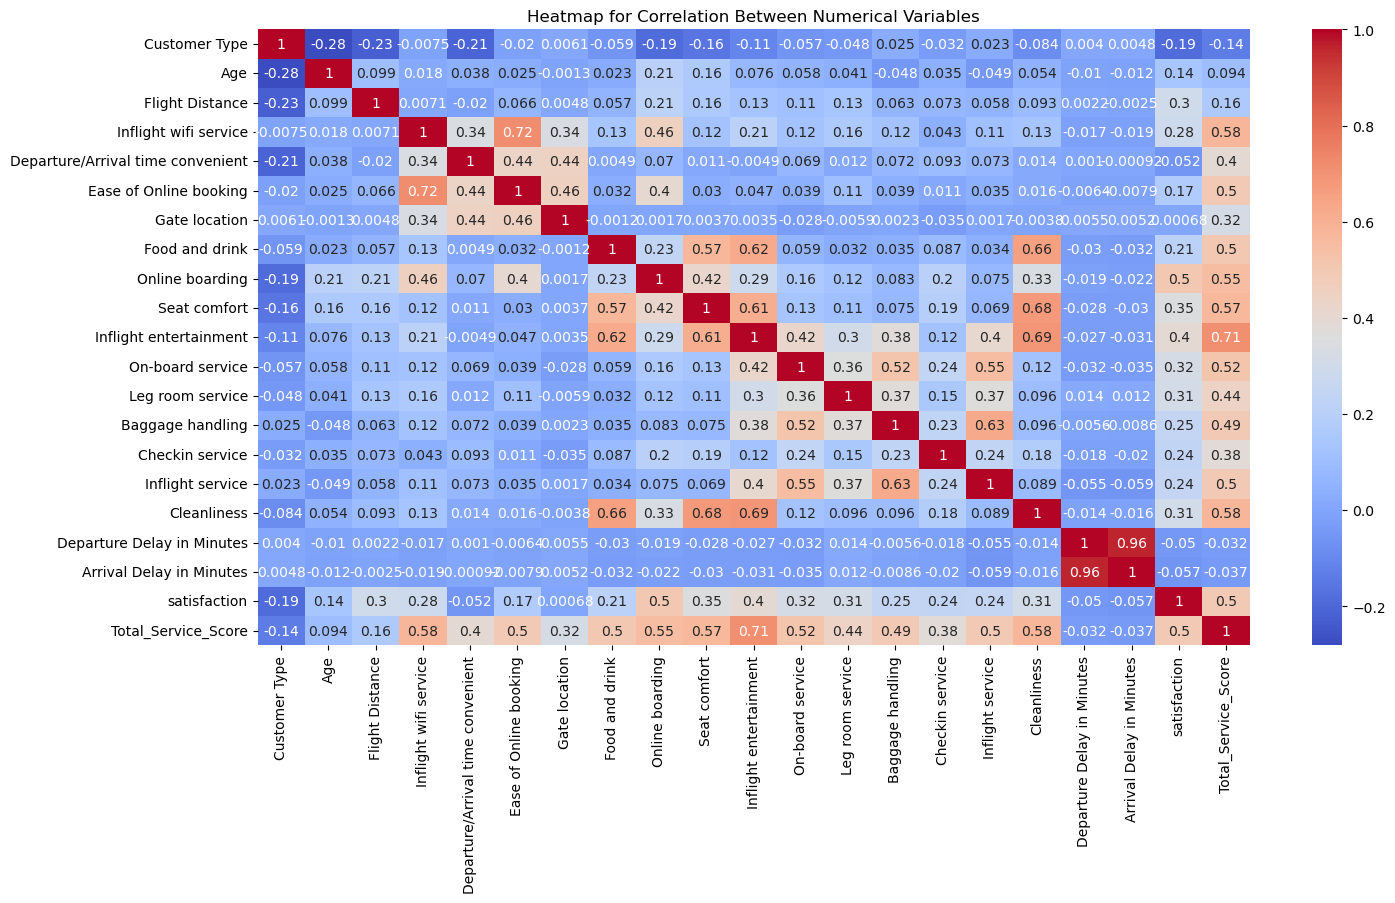

In [55]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Heatmap for correlation
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap for Correlation Between Numerical Variables')
plt.show()

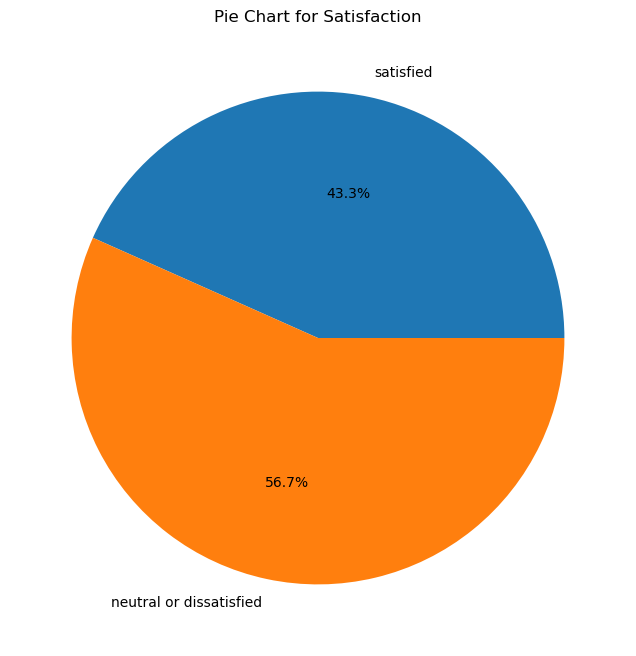

In [56]:
# Pie chart for "Satisfaction"
plt.figure(figsize=(8, 8))
labels = ['satisfied', 'neutral or dissatisfied']
sizes = [df['satisfaction'].value_counts()[1], df['satisfaction'].value_counts()[0]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart for Satisfaction')
plt.show()

##### The pie chart above illustrates the distribution of satisfaction levels in the dataset:

##### Dissatisfied: 56.7% of the passengers were dissatisfied.
##### Satisfied: 43.3% of the passengers were satisfied.
##### This distribution reveals that more than half of the passengers were not satisfied with the service, highlighting potential areas for improvement.

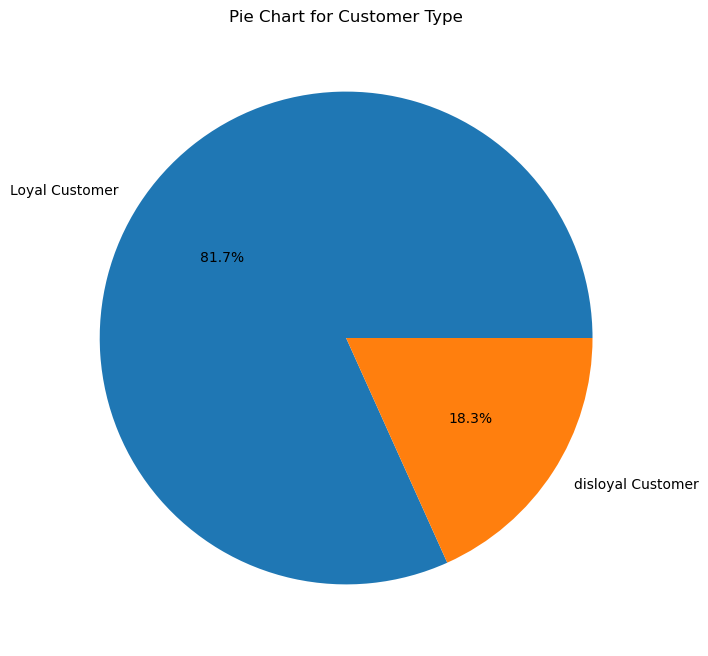

In [57]:
# Pie chart for "Customer Type"
plt.figure(figsize=(8, 8))
labels = ['Loyal Customer', 'disloyal Customer']
sizes = [df['Customer Type'].value_counts()[0], df['Customer Type'].value_counts()[1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart for Customer Type')
plt.show()

##### The pie chart above illustrates the distribution of customer types in the dataset:

##### Loyal: 81.8% of the passengers are loyal customers.
##### Disloyal: 18.2% of the passengers are disloyal customers.
##### The majority of passengers are categorized as loyal customers. This can be seen as a positive sign for the airline, but it's essential to consider the satisfaction levels among these loyal customers to maintain their loyalty.

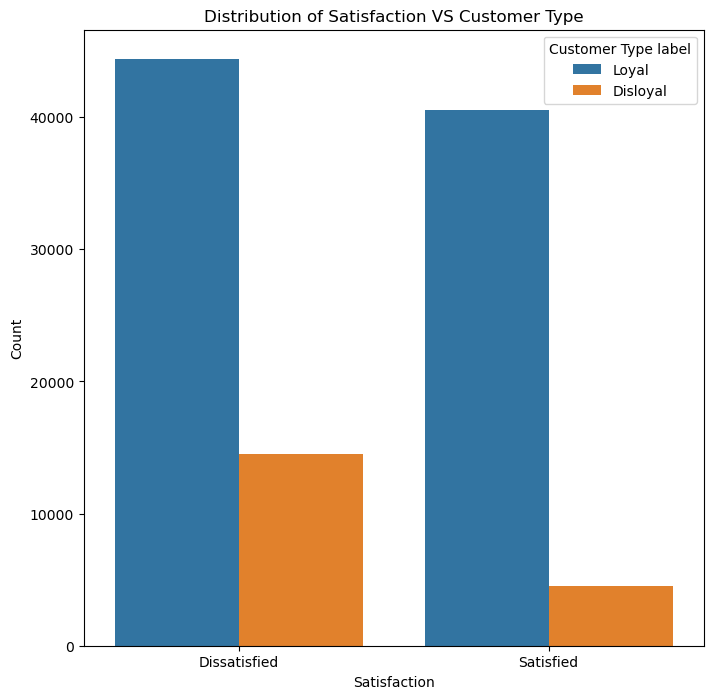

In [58]:
# Creating a label for Customer Type for the plot
df['Customer Type label'] = df['Customer Type'].map({0: 'Loyal', 1: 'Disloyal'})
df['satisfaction_label'] = df['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'})

# Plotting the distribution of satisfaction by Customer Type
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='satisfaction_label', hue='Customer Type label')
plt.title('Distribution of Satisfaction VS Customer Type')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()


The plot visualizes the distribution of satisfaction levels among airline passengers, categorized by customer type (Loyal vs. Disloyal). Here's what the plot indicates:

### **Loyal Customers:**
##### **Satisfaction:** A significant number of loyal customers are satisfied.
##### **Dissatisfaction:** There is also a considerable number of loyal customers who are dissatisfied.

### **Disloyal Customers:**
##### **Satisfaction:** The number of satisfied disloyal customers is relatively low.
##### **Dissatisfaction:** Most disloyal customers are dissatisfied.

### **Comparison between Loyal and Disloyal Customers:**
##### Loyal customers are more likely to be satisfied compared to disloyal customers.
##### Dissatisfaction is prevalent among both loyal and disloyal customers, but it's notably higher among disloyal customers.

### **Insights for Improvement:**
##### **Understanding Loyalty:** TMeasuring customer disloyalty in airlines can be done through tracking a decline in repeat bookings,  monitoring lack of engagement with loyalty programs, identifying complaint patterns, assessing negative social media sentiment, understanding high price sensitivity, observing regular switching to competitors, evaluating lack of engagement with communication channels, monitoring a decline in the usage of ancillary services, and utilizing the Net Promoter Score (NPS) to gauge unwillingness to recommend the airline.
##### **Addressing Dissatisfaction:** The high level of dissatisfaction among disloyal customers indicates a need to identify specific areas for improvement. This could involve analyzing service aspects, convenience, pricing, or other factors that might influence customer loyalty and satisfaction.

### **Strategic Considerations:**
##### **Retention Strategies:** Given the satisfaction among loyal customers, retention strategies targeting this segment could be beneficial.
##### **Acquisition and Conversion:** Efforts to convert disloyal customers into loyal ones by addressing their pain points could lead to increased overall satisfaction and business growth.
##### **In conclusion**, this plot reveals important insights into customer loyalty and satisfaction. By understanding and addressing the specific needs and preferences of different customer segments, the airline can align its strategies with Total Quality Management (TQM) principles to enhance overall service quality and customer satisfaction.

##### ----------------------------------------------------------------------------------------------------------------------------------------

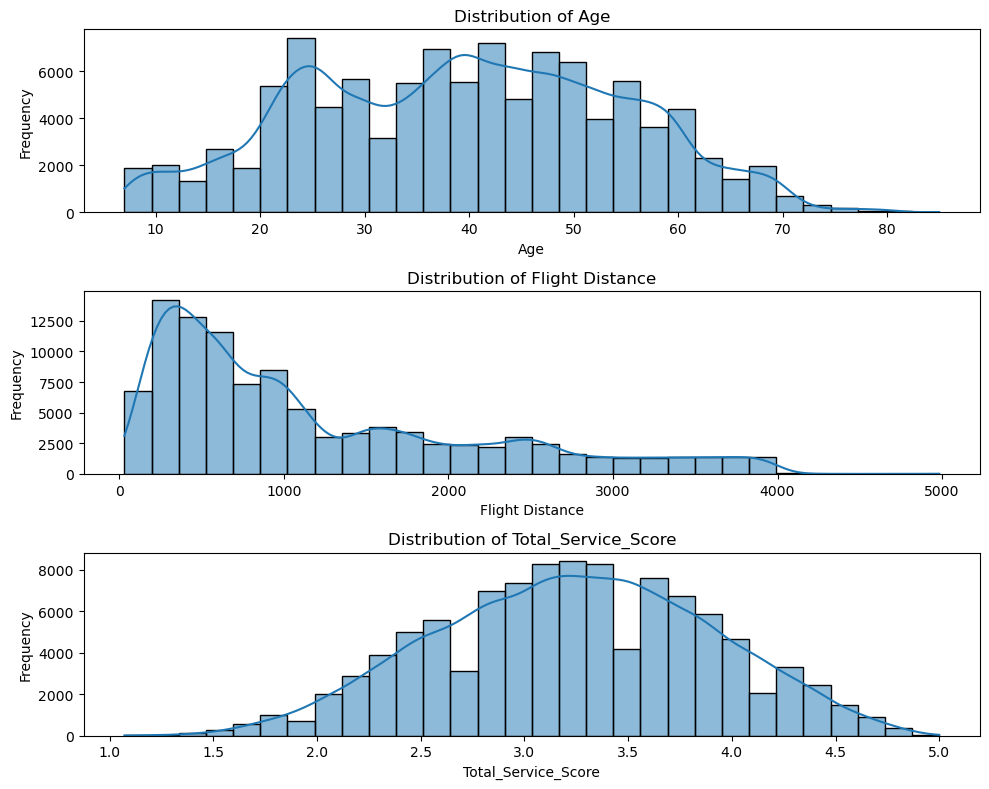

In [59]:
# Plotting the distribution for "Age" and "Flight Distance" features
features_to_plot = ['Age', 'Flight Distance', 'Total_Service_Score']

fig, axes = plt.subplots(nrows=len(features_to_plot), figsize=(10, 8))
for i, col in enumerate(features_to_plot):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


##### *Age*: The age distribution shows peaks around the mid-20s and mid-40s, with passengers of various ages present in the dataset.
##### *Flight Distance*: Most of the flight distances are short to medium, with a decreasing frequency as the distance increases.
##### *Total_Service_Score:* The distribution shows that most passengers rate the services around the median values, with some variations.

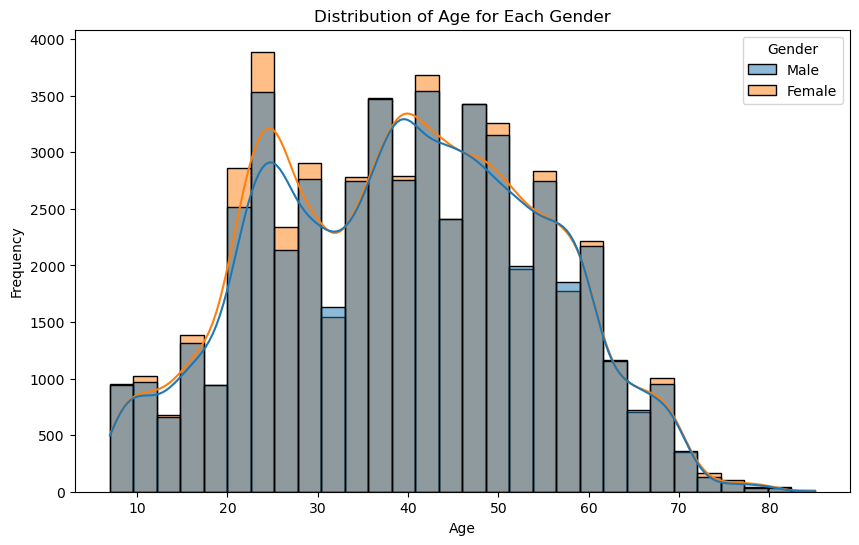

In [60]:
# Plotting the distribution of "Age" for each gender
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Gender', bins=30, kde=True)
plt.title('Distribution of Age for Each Gender')
plt.ylabel('Frequency')
plt.show()


##### *Male*: The age distribution for male passengers shows peaks around the mid-20s and mid-40s, similar to the overall distribution.
##### *Female*: The age distribution for female passengers follows a similar pattern, with peaks in the same age groups.

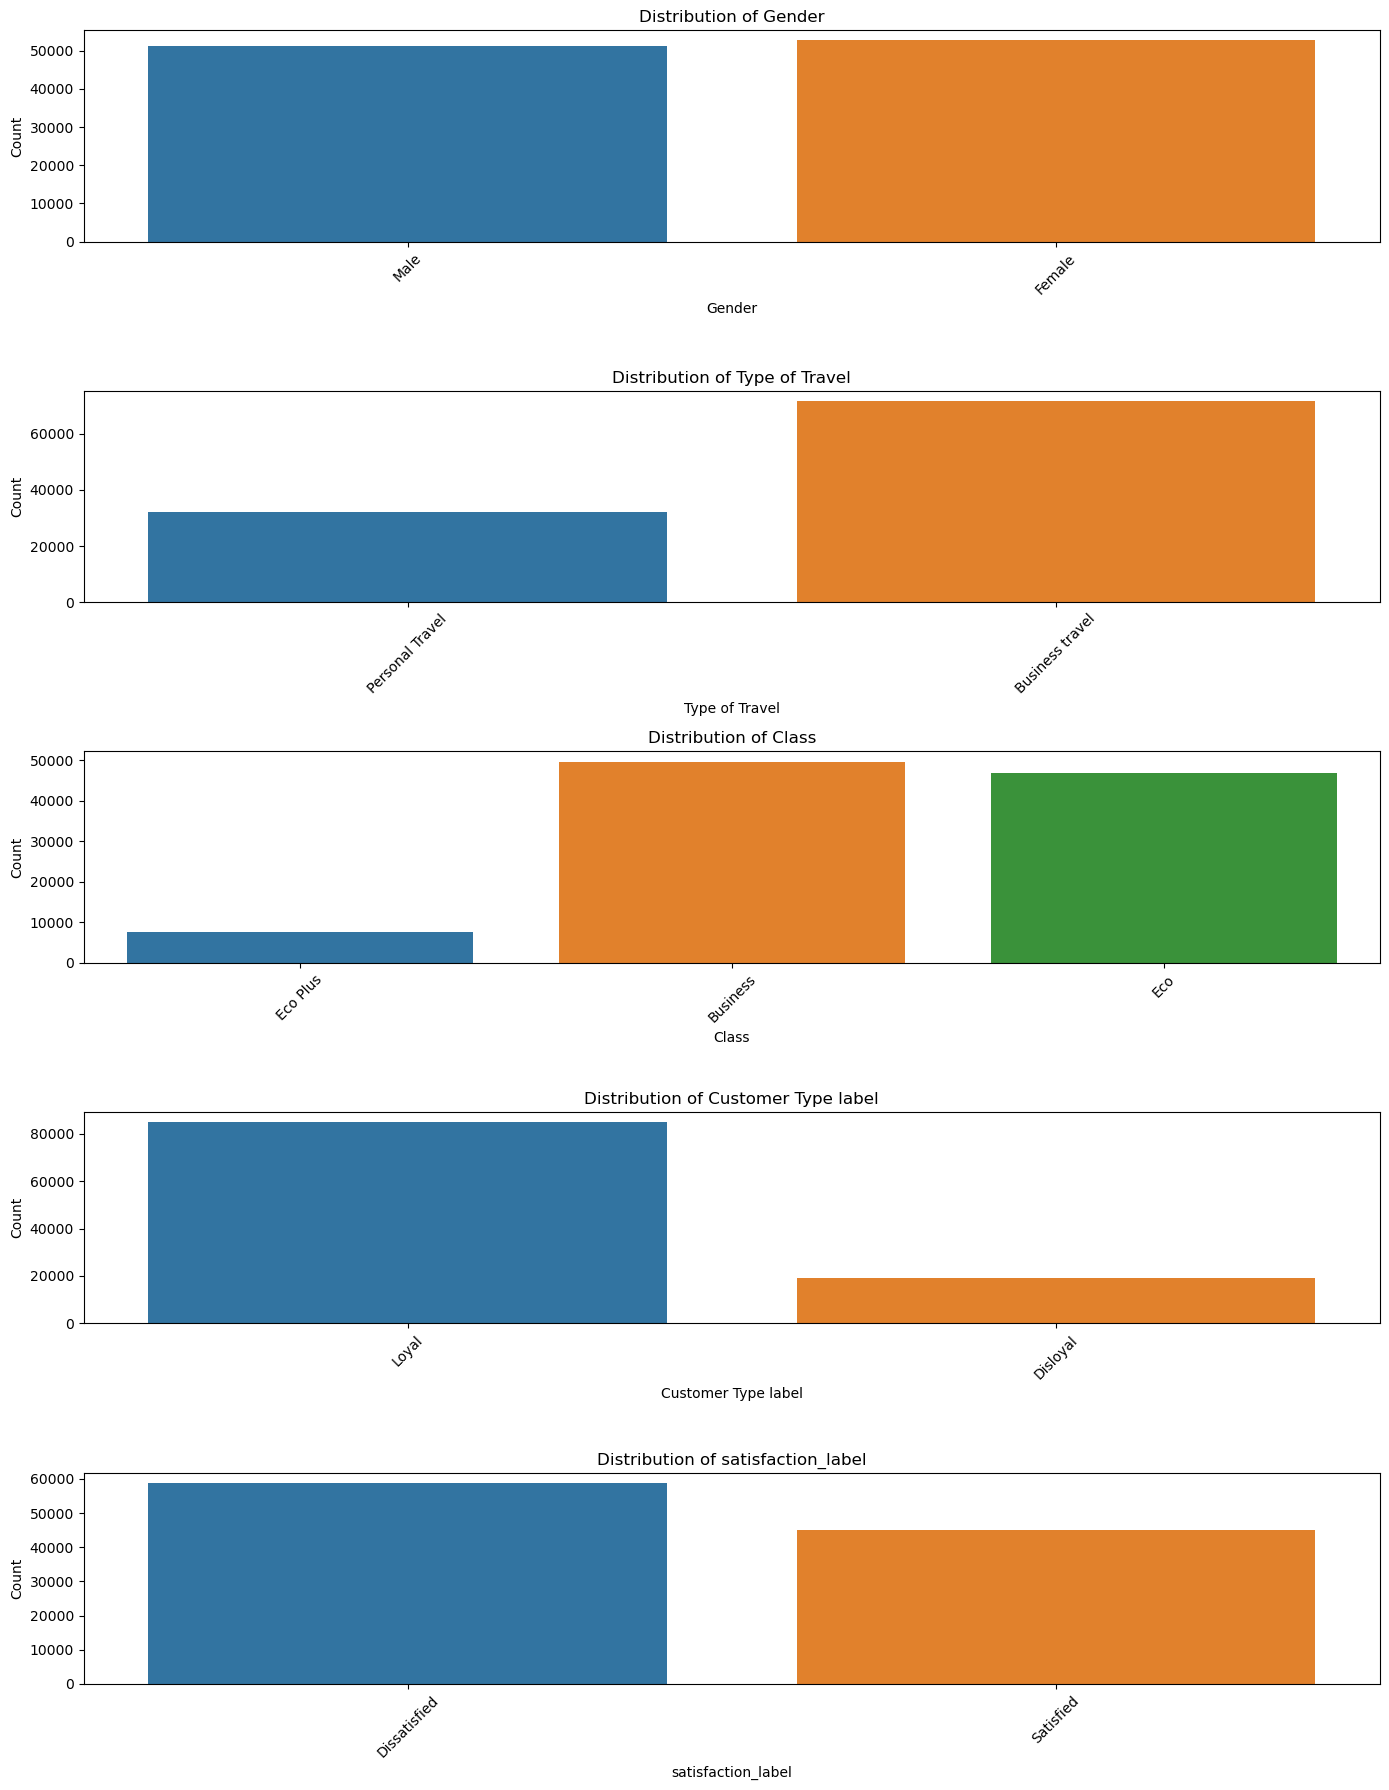

In [61]:
# Selecting object columns for analysis
object_columns = df.select_dtypes(include=['object']).columns

# Plotting the distribution of object columns
fig, axes = plt.subplots(nrows=len(object_columns), figsize=(14, 18))
for i, col in enumerate(object_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

##### *Gender*: There is a fairly balanced distribution between male and female passengers.
##### *Customer Type*: Most passengers are classified as "Loyal Customers."
##### *Type of Travel*: A majority of passengers travel for business purposes.
##### *Class*: The majority of passengers travel in Business class, followed by Eco class and Eco Plus class.
##### *Satisfaction*: There seems to be more neutral or dissatisfied passengers than satisfied ones.

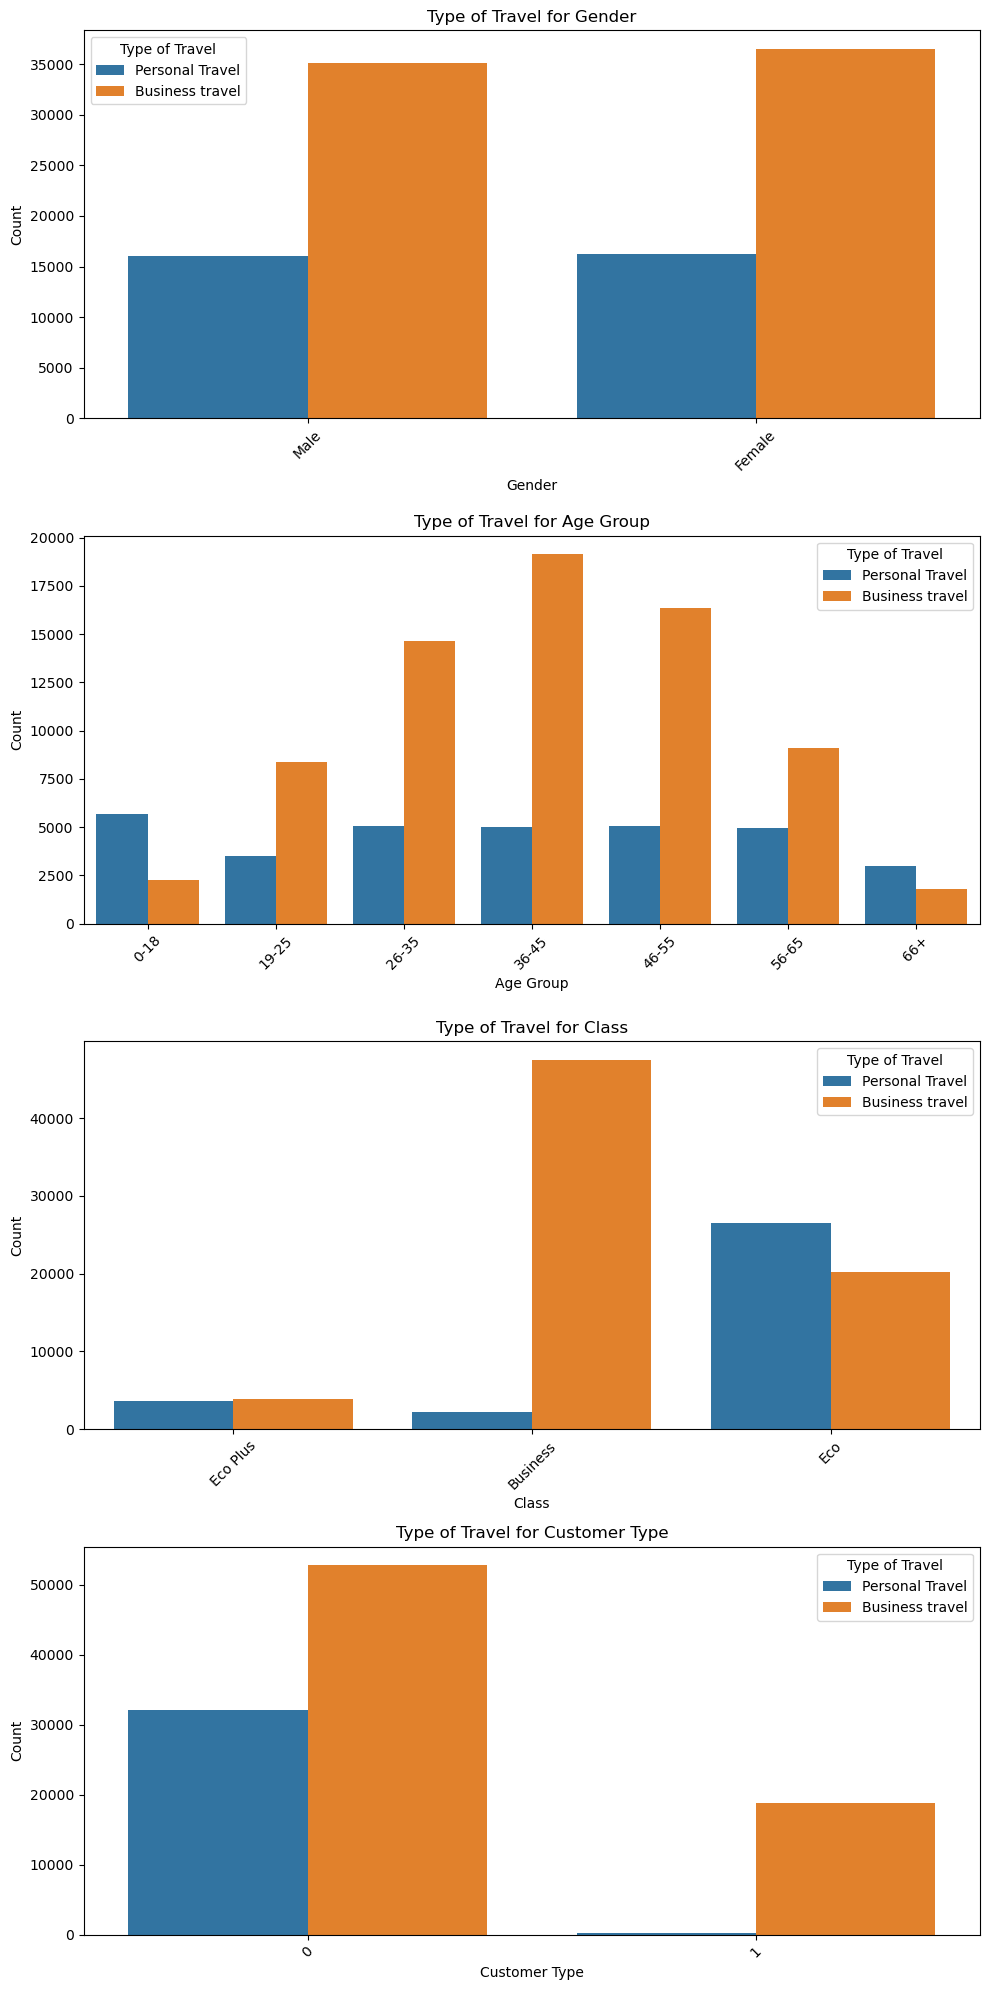

In [62]:
# Creating age bins
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Analysis 1: Type of Travel with Age Bins
features_for_travel_type_age_bins = ['Gender', 'Age Group', 'Class', 'Customer Type']

# Plotting the distribution of "Type of Travel" for the specified features with age bins
fig, axes = plt.subplots(nrows=len(features_for_travel_type_age_bins), figsize=(10, 20))
for i, col in enumerate(features_for_travel_type_age_bins):
    sns.countplot(data=df, x=col, hue='Type of Travel', ax=axes[i])
    axes[i].set_title(f'Type of Travel for {col}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

##### **Gender:** 
Both males and females have a similar pattern, with more passengers traveling for business purposes.
##### **Age:**
The binned age distribution reveals that passengers in the 19-25 and 26-35 age groups predominantly travel for business, while other age groups have a more balanced distribution.
##### **Class:**
Business class travelers are mainly on business trips, while Eco and Eco Plus class travelers have a more mixed distribution between personal and business travel.
##### **Customer Type:**
Loyal customers are more likely to travel for business, while disloyal customers have a balanced distribution between personal and business travel.

# Distribution of "Class" for the specified features

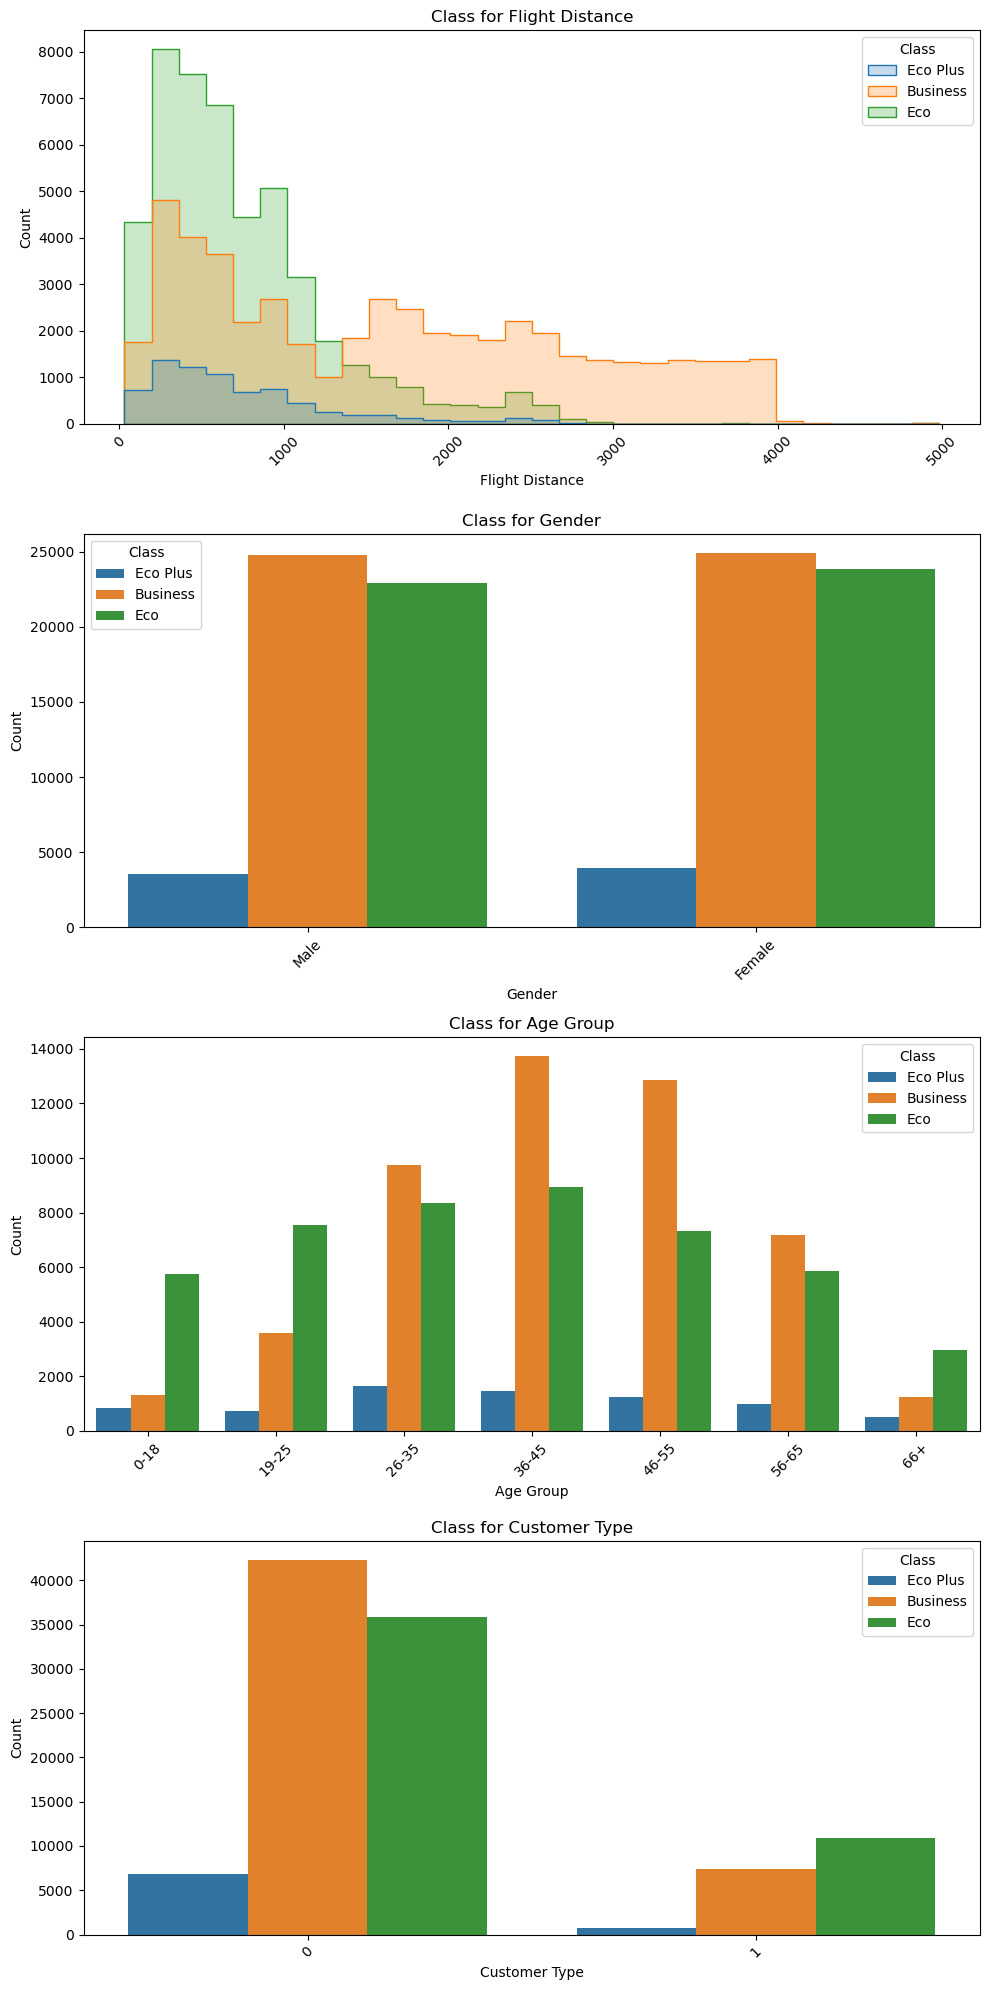

In [63]:
# Analysis 2: Class with Age Bins
features_for_class_age_bins = ['Flight Distance', 'Gender', 'Age Group', 'Customer Type']

# Plotting the distribution of "Class" for the specified features with age bins
fig, axes = plt.subplots(nrows=len(features_for_class_age_bins), figsize=(10, 20))
for i, col in enumerate(features_for_class_age_bins):
    if col == 'Flight Distance':
        sns.histplot(df, x=col, hue='Class', element='step', bins=30, ax=axes[i])
    else:
        sns.countplot(data=df, x=col, hue='Class', ax=axes[i])
    axes[i].set_title(f'Class for {col}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

##### **Flight Distance:**

-Shorter flights have a mix of Business, Eco, and Eco Plus classes.
-Medium to longer flights tend to have more Business class passengers.

##### **Gender:**

-Both males and females have a similar distribution across classes, with a majority traveling in Business class.

##### **Age:**

-The Business class has a broader age distribution, with a concentration around the mid-20s and mid-40s.
-Eco and Eco Plus classes have a more balanced age distribution.

##### **Customer Type:**

Loyal customers are more likely to travel in Business class, while disloyal customers are more spread across classes.

# Analyzing "Satisfaction" with Respect to "Customer Type", "Age Group", "Class", and "Total Service Score"

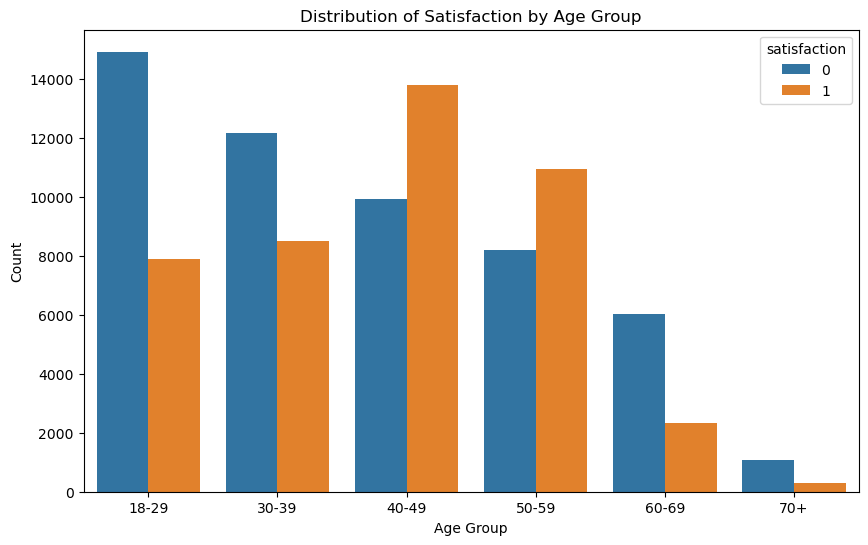

In [64]:
# Define age groups
bins = [18, 30, 40, 50, 60, 70, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Plotting the distribution of satisfaction by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age Group', hue='satisfaction')
plt.title('Distribution of Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


##### The plot above shows the distribution of satisfaction levels across different age groups. It appears that younger and older age groups tend to have more dissatisfied customers, while middle-aged groups have a higher proportion of satisfied customers.

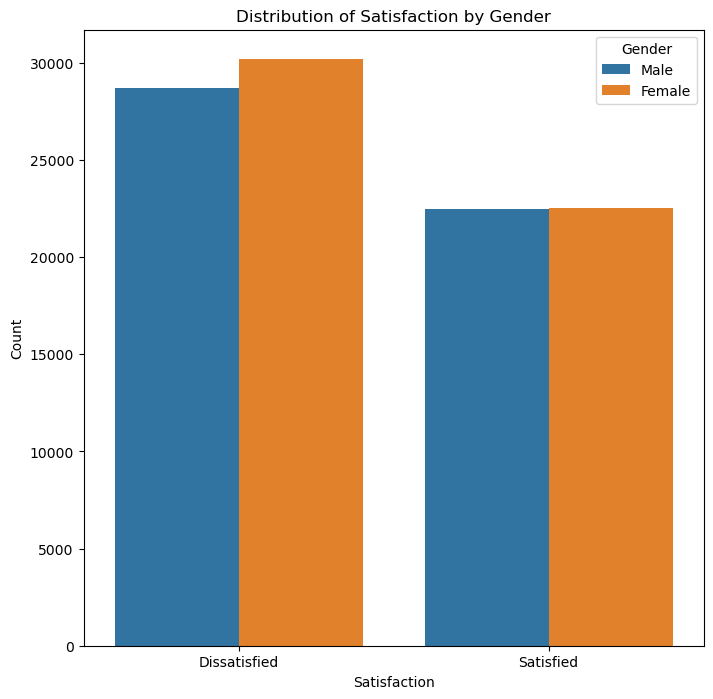

In [65]:
# Plotting the distribution of satisfaction by Gender
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='satisfaction_label', hue='Gender')
plt.title('Distribution of Satisfaction by Gender')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()


##### The plot above shows the distribution of satisfaction levels for both male and female customers. The distribution seems fairly similar between the genders.

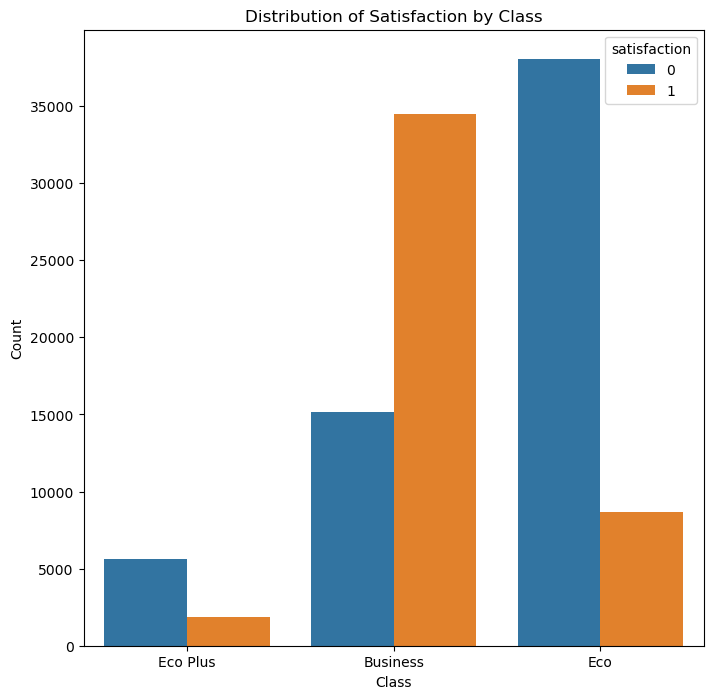

In [66]:
# Plotting the distribution of satisfaction by Class
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='Class', hue='satisfaction')
plt.title('Distribution of Satisfaction by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


##### The plot above shows the distribution of satisfaction levels across different travel classes (Eco, Eco Plus, and Business). We can observe that the **satisfaction levels are higher in the Business class**, while the **Eco class has a higher proportion of dissatisfied customers**.

## (Departure and Arrival) VS satisfaction levels

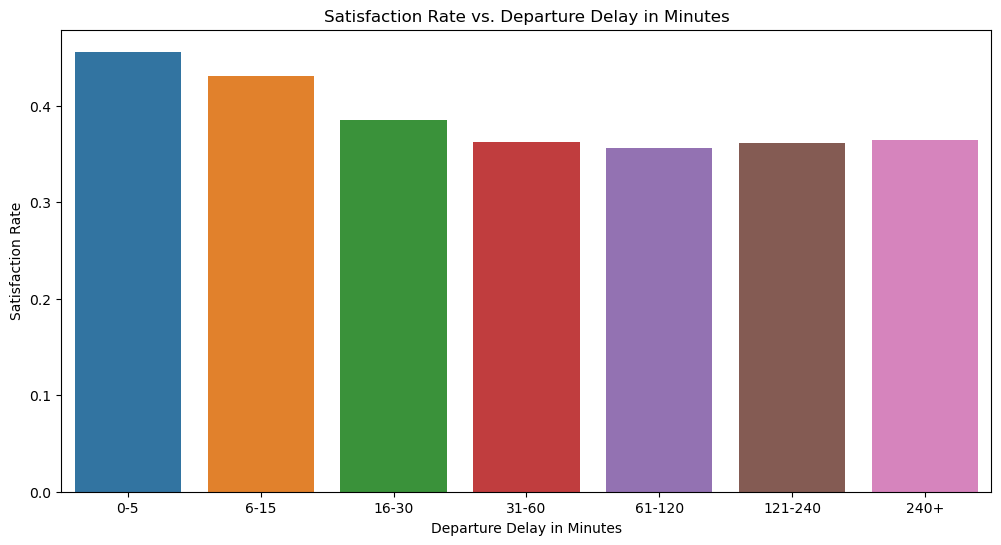

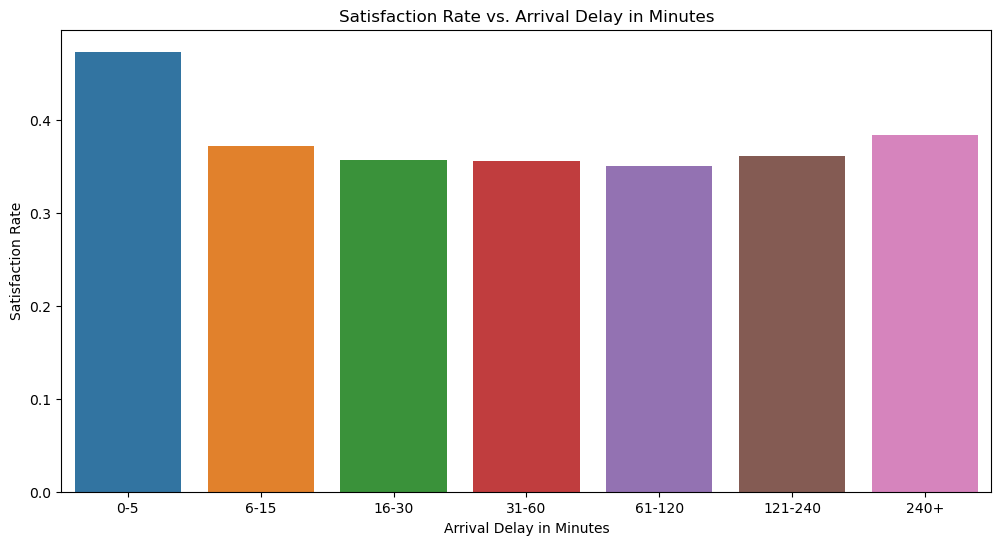

In [67]:
# Creating bins for delay intervals
delay_bins = [0, 5, 15, 30, 60, 120, 240, df['Departure Delay in Minutes'].max()]
delay_labels = ['0-5', '6-15', '16-30', '31-60', '61-120', '121-240', '240+']

# Categorizing the departure and arrival delays
df['Departure Delay Category'] = pd.cut(df['Departure Delay in Minutes'], bins=delay_bins, labels=delay_labels, right=False)
df['Arrival Delay Category'] = pd.cut(df['Arrival Delay in Minutes'], bins=delay_bins, labels=delay_labels, right=False)

# Calculating the satisfaction rate for each departure delay category
departure_delay_satisfaction_rate = df.groupby('Departure Delay Category')['satisfaction'].mean().reset_index()

# Calculating the satisfaction rate for each arrival delay category
arrival_delay_satisfaction_rate = df.groupby('Arrival Delay Category')['satisfaction'].mean().reset_index()

# Plotting the satisfaction rate for each departure delay category
plt.figure(figsize=(12, 6))
sns.barplot(x='Departure Delay Category', y='satisfaction', data=departure_delay_satisfaction_rate)
plt.title('Satisfaction Rate vs. Departure Delay in Minutes')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Satisfaction Rate')
plt.show()

# Plotting the satisfaction rate for each arrival delay category
plt.figure(figsize=(12, 6))
sns.barplot(x='Arrival Delay Category', y='satisfaction', data=arrival_delay_satisfaction_rate)
plt.title('Satisfaction Rate vs. Arrival Delay in Minutes')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Satisfaction Rate')
plt.show()


The bar plots above represent the satisfaction rate for different delay intervals, both for departure and arrival delays.

##### **Insights:**
### **Departure Delay vs. Satisfaction:**

Short Delays (0-5 minutes): The satisfaction rate is relatively high for short delays.
Medium Delays (6-30 minutes): The satisfaction rate slightly decreases as the delay increases.

Long Delays (31+ minutes): There is a noticeable drop in satisfaction with delays exceeding 30 minutes, with the lowest satisfaction rate for delays over 240 minutes.

### **Arrival Delay vs. Satisfaction:**

Similar Trends: The trends for arrival delays are quite similar to those for departure delays.

High Sensitivity to Long Delays: Passengers appear to be highly sensitive to long arrival delays, with satisfaction rates dropping significantly for delays over 30 minutes.

### **Conclusion:**
These analyses provide a more nuanced understanding of the relationship between delays and satisfaction:

Short delays do not seem to have a significant impact on satisfaction.
Medium delays have a moderate impact, with a slight decrease in satisfaction.
Long delays have a strong negative impact on satisfaction, especially when delays exceed 30 minutes.

The findings highlight the importance of minimizing long delays as part of an airline's service quality management strategy. Aligning with Total Quality Management (TQM) principles, continuous monitoring, and improvement of timeliness can enhance passenger satisfaction and loyalty.

##### ----------------------------------------------------------------------------------------------------------------------------------------------

## Satisfaction rate by Total Service Score

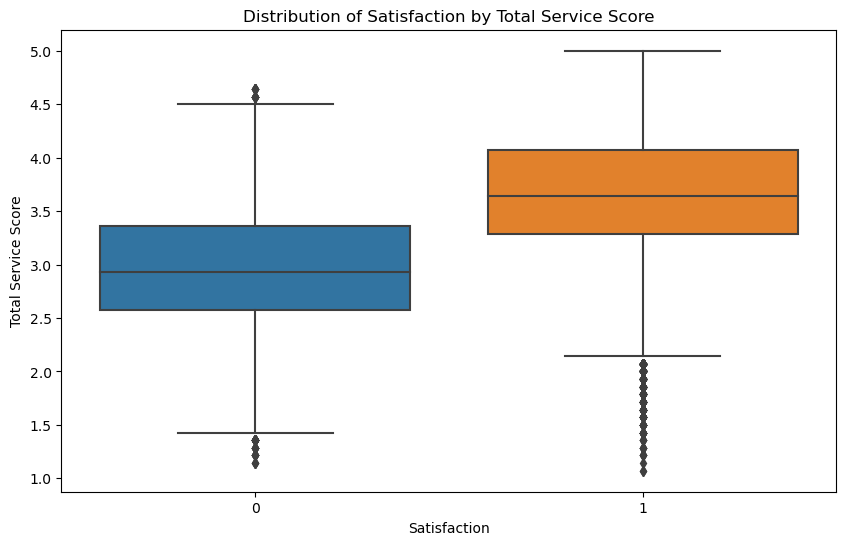

In [68]:
# Plotting the distribution of satisfaction by Total Service Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Total_Service_Score', data=df)
plt.title('Distribution of Satisfaction by Total Service Score')
plt.xlabel('Satisfaction')
plt.ylabel('Total Service Score')
plt.show()


### The boxplot above shows the distribution of the "Total Service Score" for both satisfied and dissatisfied customers. It clearly illustrates that **satisfied customers tend to have higher total service scores, while dissatisfied customers have lower scores**.

# Regression Analysis

### Satisfaction rate by Total Service Score

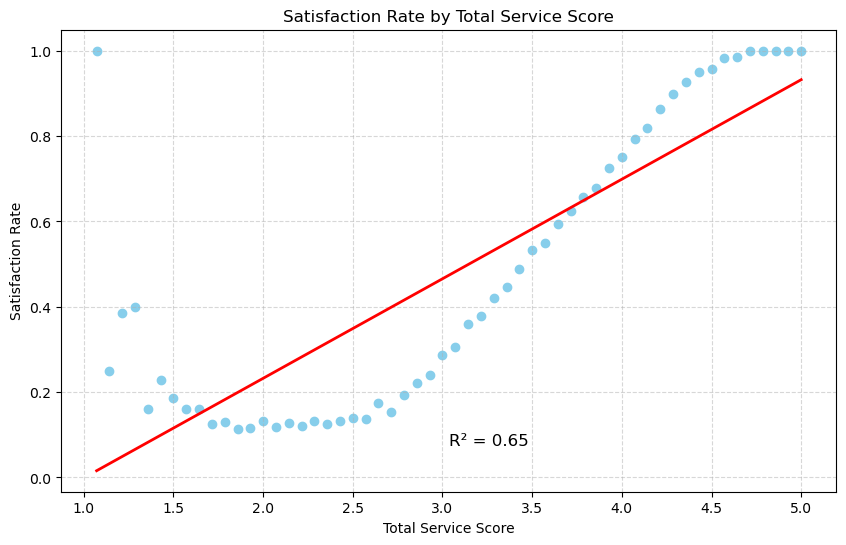

0.6539709348785732

In [69]:
from sklearn.linear_model import LinearRegression

# Grouping by Total_Service_Score and calculating the satisfaction rate for each category
total_service_satisfaction_rate = df.groupby('Total_Service_Score')['satisfaction'].mean().reset_index()
total_service_satisfaction_rate.columns = ['Total_Service_Score', 'Satisfaction_Rate']

# Preparing the data
X = total_service_satisfaction_rate['Total_Service_Score'].values.reshape(-1, 1)
y = total_service_satisfaction_rate['Satisfaction_Rate'].values

# Fitting a linear regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Calculating the R^2 value
r_squared = reg_model.score(X, y)

# Predicting the satisfaction rate for plotting the regression line
y_pred = reg_model.predict(X)

# Plotting scatter plot along with the regression line and R^2 value
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='skyblue')
plt.plot(X, y_pred, color='red', linestyle='-', linewidth=2)
plt.title('Satisfaction Rate by Total Service Score')
plt.xlabel('Total Service Score')
plt.ylabel('Satisfaction Rate')
plt.text(0.5, 0.1, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

r_squared


#### **R Square** value of **0.65** indicates that approximately 65% of the variance in the satisfaction rate can be explained by the Total Service Score. This underscores the strong positive relationship between the overall quality of service and passenger satisfaction.
#### The red line represents the linear relationship, showing that as the Total Service Score increases, the satisfaction rate also increases correspondingly.
#### This insight reaffirms the importance of focusing on service quality as a key driver of passenger satisfaction. Airlines can use this information to develop targeted strategies to enhance service components, thereby increasing overall satisfaction.

##### ---------------------------------------------------------------------------------------------------------------------------------------------

# Hypothesis Test

##### we'll need to perform the hypothesis test as follows:

##### **Null Hypothesis (H0):** There is no relationship between Total Service Score and Satisfaction Rate. (i.e., the slope of the regression line is zero)
##### **Alternative Hypothesis (H1):** There is a relationship between Total Service Score and Satisfaction Rate. (i.e., the slope of the regression line is not zero)

In [70]:
# Grouping by Total_Service_Score and calculating the satisfaction rate for each category
total_service_satisfaction_rate = df.groupby('Total_Service_Score')['satisfaction'].mean().reset_index()
total_service_satisfaction_rate.columns = ['Total_Service_Score', 'Satisfaction_Rate']

# Preparing the data
X = total_service_satisfaction_rate['Total_Service_Score']
y = total_service_satisfaction_rate['Satisfaction_Rate']

# Adding a constant to the model (intercept)
X_sm = sm.add_constant(X)

# Fitting the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_sm)
results = model.fit()

# Getting the summary of the regression
summary = results.summary()
summary_html = summary.tables[1].as_html()

# Converting to DataFrame
summary_df = pd.read_html(summary_html, header=0, index_col=0)[0]
summary_df

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.2342,0.075,-3.123,0.003,-0.385,-0.084
Total_Service_Score,0.2333,0.023,10.102,0.000,0.187,0.280


##### The summary of the linear regression provides the following information:

##### Coefficient (coef) for Total_Service_Score: 0.2333
##### Standard error (std err): 0.023
##### t-statistic (t): 10.102
##### p-value (P>|t|): 0.000
##### 95% confidence interval ([0.025, 0.975]): [0.187, 0.280]
##### The p-value for the Total_Service_Score is 0.000, which is less than the common significance level of 0.05. Therefore, we can reject the null hypothesis that there is no relationship between Total Service Score and Satisfaction Rate.

##### The positive coefficient value of 0.2333 indicates that there is a positive relationship between the Total Service Score and the Satisfaction Rate. As the Total Service Score increases, the Satisfaction Rate also increases.

##### **In conclusion,** the statistical evidence supports that the Satisfaction Rate is significantly affected by the Total_Service_Score, and the effect is positive.

##### ---------------------------------------------------------------------------------------------------------------------------------------

# Satisfaction Simulation
#### Running Simulation to Analyze the Effect of Increasing Total Service Score


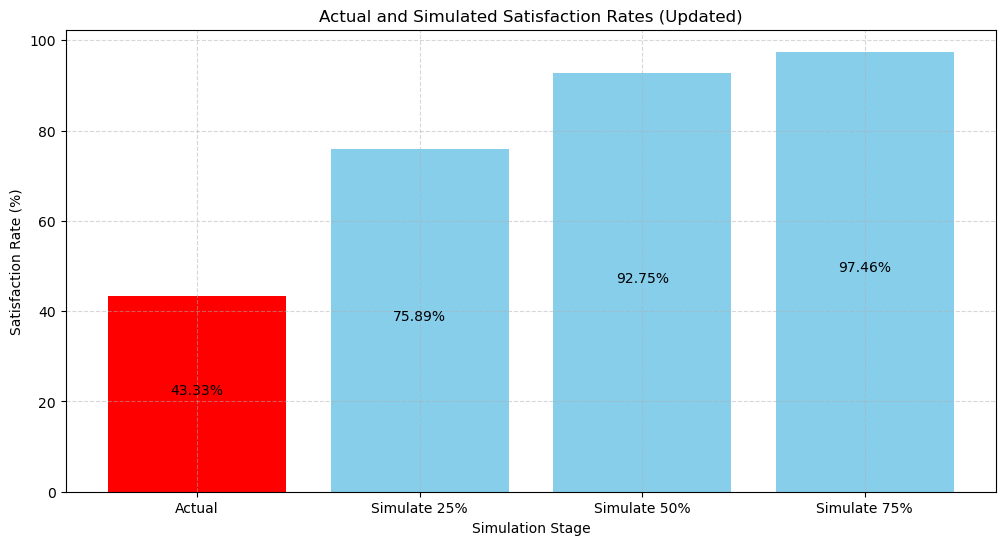

,Increase Percentage,Simulated Satisfaction Rate,Variance from Actual (%)
0,Actual,0.433333,0.000000
1,Simulate 25%,0.758883,32.555051
2,Simulate 50%,0.927462,49.412920
3,Simulate 75%,0.974563,54.123037


In [71]:
from sklearn.linear_model import LogisticRegression

# Defining the percentages by which we want to increase the Total Service Score
increase_percentages = [25, 50, 75]

# Fitting a logistic regression model to predict satisfaction based on the updated Total Service Score
logistic_model = LogisticRegression()
logistic_model.fit(df['Total_Service_Score'].values.reshape(-1, 1), df['satisfaction'].values)

# Recalculating the actual satisfaction rate
satisfaction_rate = df['satisfaction'].mean()

# Simulating the effect of increasing Total Service Score by 25%, 50%, and 75%
simulated_satisfaction_rates_updated = [satisfaction_rate]
for percentage in increase_percentages:
    increased_service_score = df['Total_Service_Score'].values.reshape(-1, 1) * (1 + percentage / 100)
    simulated_satisfaction_rate = logistic_model.predict(increased_service_score).mean()
    simulated_satisfaction_rates_updated.append(simulated_satisfaction_rate)

# Creating a DataFrame to show the updated results
simulation_results_updated = pd.DataFrame({
    'Increase Percentage': ['Actual'] + [f'Simulate {p}%' for p in increase_percentages],
    'Simulated Satisfaction Rate': simulated_satisfaction_rates_updated
})

# Calculate the variance between the simulated satisfaction rate and the actual satisfaction rate
simulation_results_updated['Variance from Actual (%)'] = (simulation_results_updated['Simulated Satisfaction Rate'] - satisfaction_rate) * 100


# Plotting a bar chart for the actual and simulated satisfaction rates
plt.figure(figsize=(12, 6))
plt.bar(simulation_results_updated['Increase Percentage'], simulation_results_updated['Simulated Satisfaction Rate'] * 100, color=['red'] + ['skyblue']*3)
plt.title('Actual and Simulated Satisfaction Rates (Updated)')
plt.xlabel('Simulation Stage')
plt.ylabel('Satisfaction Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
for i, rate in enumerate(simulation_results_updated['Simulated Satisfaction Rate']):
    plt.text(i, rate * 100 / 2, f'{rate * 100:.2f}%', ha='center', color='black')
plt.show()

simulation_results_updated


#### The bar chart and table above show the actual and simulated satisfaction rates based on increases in the "Total Service Score." The simulation was conducted for three scenarios: increasing the total service score by 25%, 50%, and 75%.

#### Here are the insights:

##### Actual Satisfaction Rate: 43.33% of passengers were satisfied with the current service score.
##### Simulated 25% Increase: If the total service score were increased by 25%, the satisfaction rate would rise with 32.55% to reach approximately 75.89%.
##### Simulated 50% Increase: A 50% increase in the total service score would lead to a rise in satisfaction rate by 49.41% to reach approximately 92.75%.
##### Simulated 75% Increase: A 75% increase in the total service score would further boost the satisfaction rate to rise 54.12% to reach approximately 97.46%.



# Conclusion
### The simulation clearly demonstrates the strong impact of the total service score on passenger satisfaction. In line with TQM's focus on continuous improvement, incremental increases in the service score lead to substantial enhancements in satisfaction rates. This reaffirms the importance of a customer-centric approach, where understanding and meeting customer needs are central to achieving higher levels of satisfaction.
### TQM encourages a holistic view of quality management, and the simulation results align with this perspective. Investments in various service aspects (such as inflight services, online booking ease, seat comfort, etc.) are not isolated efforts but part of an integrated strategy to enhance overall customer experience. Collaborative efforts across different departments can foster a culture of quality and consistency.
### Moreover, the relationship between total service score and satisfaction emphasizes the importance of monitoring and measuring performance metrics, another core TQM principle. Regular assessment and feedback can guide targeted improvements and ensure alignment with customer expectations.
### Ultimately, the application of TQM principles in improving service quality can lead to significant growth in customer satisfaction. This, in turn, can contribute to increased customer loyalty, positive word-of-mouth, and long-term success for the airline business. The simulation results provide actionable insights that resonate with TQM's philosophy of customer focus, continuous improvement, and organizational synergy.